In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
corr_xy = 0.7

mean = [-1, 1] # mean of normal distribution
cov = [[1, corr_xy], 
       [corr_xy, 1]] # covariance of normal distribution
sample = np.random.multivariate_normal(mean, cov, size=1000) # 1000 normally distributed samples

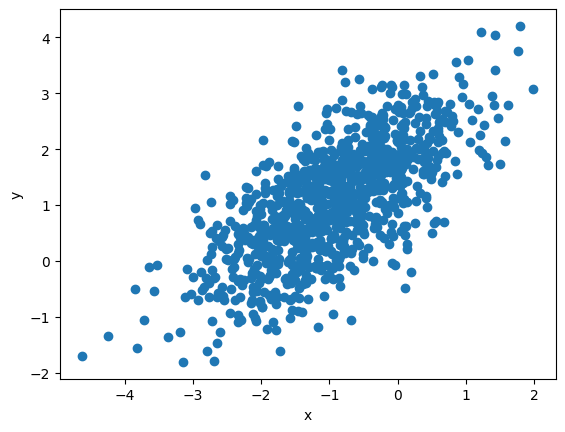

In [3]:
x, y = sample[:, 0], sample[:, 1]  # separate samples on feature x and target y

# Visualize dataset
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Навчимо лінійну регресію (без вільного члена в залежності)

$ y \sim \beta_1 x $

In [4]:
x.shape, x.reshape(-1,1).shape

((1000,), (1000, 1))

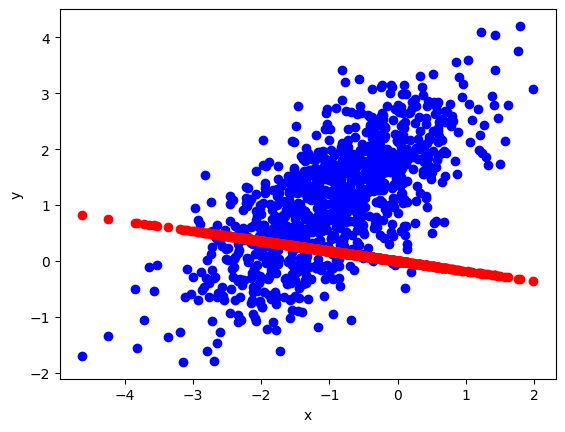

In [5]:
lr = LinearRegression(fit_intercept=False)
lr.fit(x.reshape(-1,1), y)

y_pred = lr.predict(x.reshape(-1,1))

# Visualize dataset
plt.scatter(x, y, color = 'blue')
plt.scatter(x, y_pred, color = 'red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Оцінена лінія обов'язково буде проходити через точку (0,0), оскільки в ній немає вільного члена

$ y = \beta_1 x $

$ 0 = \beta_1 0 $

Навчимо лінійну регресію по-іншому (включаючи вільний член в залежності)

$ y \sim \beta_0 1 + \beta_1 x $

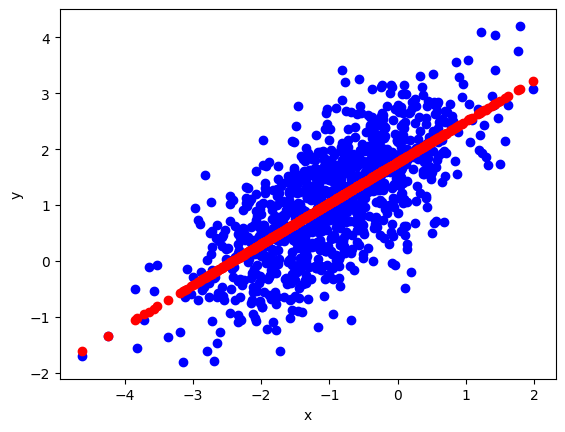

In [6]:
lr_bias = LinearRegression(fit_intercept=True)
lr_bias.fit(x.reshape(-1,1), y)

y_pred_bias = lr_bias.predict(x.reshape(-1,1))

# Visualize dataset
plt.scatter(x, y, color = 'blue')
plt.scatter(x, y_pred_bias, color = 'red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Як зробити, щоб вільний член був у моделі, коли реалізуєте алгоритм вручну? Додати до матриці x стовпець із одиницями.

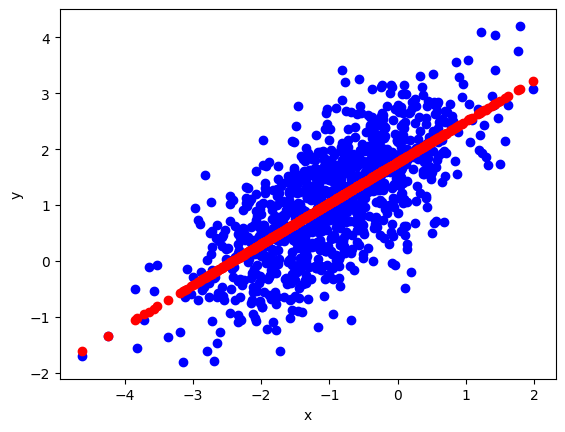

In [8]:
X = np.array([np.array([1, val]) for val in x])

lr3 = LinearRegression(fit_intercept = False)
lr3.fit(X, y)

y_pred3 = lr3.predict(X)

# Visualize dataset
plt.scatter(x, y, color = 'blue')
plt.scatter(x, y_pred3, color = 'red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()